In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('../transaction_data_version3.csv')

In [3]:
df

,household_key,MEMBER,BASKET_ID,PRODUCT_ID,QUANTITY,SALES_VALUE,WEEK_NO,DAY,DATE,hour_time
0,2375,0,26984851472,1004906,1,1.39,1,1,2019-07-30,16:00:00
1,1929,1,27021022215,1004906,1,1.39,1,4,2019-08-02,17:00:00
2,568,0,27021090189,1004906,1,1.39,1,4,2019-08-02,00:00:00
3,887,0,27031467254,1004906,1,1.39,1,5,2019-08-03,15:00:00
4,175,0,27057508267,1004906,1,1.99,2,7,2019-08-05,23:00:00
...,...,...,...,...,...,...,...,...,...,...
2551702,1598,0,42305362535,92130,1,0.99,102,711,2021-07-09,15:00:00
2551703,1598,0,42305362535,114102,1,8.89,102,711,2021-07-09,15:00:00
2551704,1598,0,42305362535,133449,1,6.99,102,711,2021-07-09,15:00:00
2551705,1598,0,42305362535,6923644,1,4.50,102,711,2021-07-09,15:00:00


In [4]:
product_df = pd.read_csv('../product.csv')

In [5]:
product_df

,PRODUCT_ID,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT
0,25671,2,GROCERY,National,FRZN ICE,ICE - CRUSHED/CUBED,22 LB
1,26081,2,MISC. TRANS.,National,NO COMMODITY DESCRIPTION,NO SUBCOMMODITY DESCRIPTION,
2,26093,69,PASTRY,Private,BREAD,BREAD:ITALIAN/FRENCH,
3,26190,69,GROCERY,Private,FRUIT - SHELF STABLE,APPLE SAUCE,50 OZ
4,26355,69,GROCERY,Private,COOKIES/CONES,SPECIALTY COOKIES,14 OZ
...,...,...,...,...,...,...,...
92348,18293142,6384,DRUG GM,National,BOOKSTORE,PAPERBACK BOOKS,
92349,18293439,6393,DRUG GM,National,BOOKSTORE,CHILDRENS LOW END,
92350,18293696,6406,DRUG GM,National,BOOKSTORE,PAPERBACK BEST SELLER,
92351,18294080,6442,DRUG GM,National,BOOKSTORE,PAPERBACK BOOKS,


In [6]:
product_df1 = product_df[['PRODUCT_ID','SUB_COMMODITY_DESC']]

In [7]:
df_merge = df.merge(product_df1,on='PRODUCT_ID')

In [8]:
df_merge

,household_key,MEMBER,BASKET_ID,PRODUCT_ID,QUANTITY,SALES_VALUE,WEEK_NO,DAY,DATE,hour_time,SUB_COMMODITY_DESC
0,2375,0,26984851472,1004906,1,1.39,1,1,2019-07-30,16:00:00,POTATOES RUSSET (BULK&BAG)
1,1929,1,27021022215,1004906,1,1.39,1,4,2019-08-02,17:00:00,POTATOES RUSSET (BULK&BAG)
2,568,0,27021090189,1004906,1,1.39,1,4,2019-08-02,00:00:00,POTATOES RUSSET (BULK&BAG)
3,887,0,27031467254,1004906,1,1.39,1,5,2019-08-03,15:00:00,POTATOES RUSSET (BULK&BAG)
4,175,0,27057508267,1004906,1,1.99,2,7,2019-08-05,23:00:00,POTATOES RUSSET (BULK&BAG)
...,...,...,...,...,...,...,...,...,...,...,...
2551702,1598,0,42305362535,92130,1,0.99,102,711,2021-07-09,15:00:00,MARGARINE: TUBS AND BOWLS
2551703,1598,0,42305362535,114102,1,8.89,102,711,2021-07-09,15:00:00,BEERALEMALT LIQUORS
2551704,1598,0,42305362535,133449,1,6.99,102,711,2021-07-09,15:00:00,BEERALEMALT LIQUORS
2551705,1598,0,42305362535,6923644,1,4.50,102,711,2021-07-09,15:00:00,BEERALEMALT LIQUORS


In [9]:
df_merge.groupby('SUB_COMMODITY_DESC')['QUANTITY'].sum().sort_values()

SUB_COMMODITY_DESC
*ATH ACCES:TOWEL BARS/SOAP D          1
LUNCHMEAT-RW-ALL                      1
LUBRICANTS/CLEANERS                   1
LOTTO/GAMBLING-MAGAZINE               1
SEASONAL BARBIE                       1
                                  ...  
CANDY BARS (SINGLES)(INCLUDING    46285
SFT DRNK 2 LITER BTL CARB INCL    54432
SOFT DRINKS 12/18&15PK CAN CAR    55022
YOGURT NOT MULTI-PACKS            66198
FLUID MILK WHITE ONLY             91476
Name: QUANTITY, Length: 2362, dtype: int64

In [10]:
df_milk = df_merge.query('SUB_COMMODITY_DESC == "FLUID MILK WHITE ONLY"')

In [11]:
df_milk

,household_key,MEMBER,BASKET_ID,PRODUCT_ID,QUANTITY,SALES_VALUE,WEEK_NO,DAY,DATE,hour_time,SUB_COMMODITY_DESC
64006,1172,1,26985025264,1106523,1,1.50,1,1,2019-07-30,09:00:00,FLUID MILK WHITE ONLY
64007,293,0,27008831408,1106523,1,2.49,1,3,2019-08-01,15:00:00,FLUID MILK WHITE ONLY
64008,2324,1,27008841880,1106523,1,2.49,1,3,2019-08-01,15:00:00,FLUID MILK WHITE ONLY
64009,2105,0,27008940074,1106523,1,2.49,1,2,2019-07-31,22:00:00,FLUID MILK WHITE ONLY
64010,593,1,27009065728,1106523,1,2.49,1,3,2019-08-01,10:00:00,FLUID MILK WHITE ONLY
...,...,...,...,...,...,...,...,...,...,...,...
2542642,1128,1,41310775115,15596538,2,4.20,92,637,2021-04-26,22:00:00,FLUID MILK WHITE ONLY
2542643,2205,0,41931621283,15596538,2,2.00,98,684,2021-06-12,14:00:00,FLUID MILK WHITE ONLY
2542644,979,1,42250660257,15596538,1,2.00,102,708,2021-07-06,10:00:00,FLUID MILK WHITE ONLY
2549693,1102,0,42009338024,939511,1,0.29,99,690,2021-06-18,20:00:00,FLUID MILK WHITE ONLY


In [12]:
df_milk_1 = df_milk[['DATE','QUANTITY']]

In [13]:
df_milk_1 = df_milk.groupby('DATE')['QUANTITY'].sum().reset_index()

In [14]:
from pandas import to_datetime


df_milk_1['DATE']= to_datetime(df_milk_1['DATE'])

In [15]:
import datetime as dt
df_milk_1['DATE'] = df_milk_1['DATE'].dt.strftime('%Y-%m-%d')  #原本是%Y-%m-01

In [16]:
df_milk_1 = df_milk_1.groupby('DATE')['QUANTITY'].sum().reset_index().set_index('DATE')

In [17]:
df_milk_1

,QUANTITY
DATE,
2019-07-30,2
2019-07-31,6
2019-08-01,13
2019-08-02,13
2019-08-03,8
...,...
2021-07-05,94
2021-07-06,104
2021-07-07,107


<AxesSubplot:xlabel='DATE'>

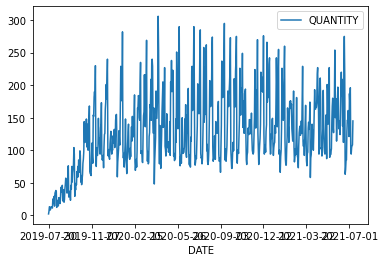

In [18]:
df_milk_1.plot()

In [19]:
from statsmodels.tsa.stattools import adfuller
results = adfuller(df_milk_1['QUANTITY'])  
print(results)

(-3.4184975211894804, 0.010344224726260662, 20, 688, {'1%': -3.439890503006147, '5%': -2.865750085260771, '10%': -2.569011980884938}, 6880.3686060152795)


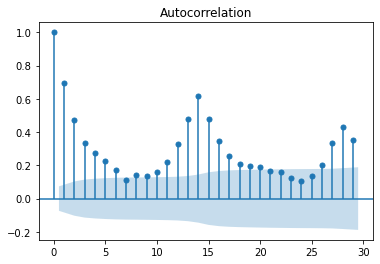

In [20]:
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt
 
# Plot the ACF of savings on ax1
plot_acf(df_milk_1['QUANTITY'])

plt.show()

### --------------------------------------------------------------------------------------------------------------------------------------------------------------

### 模型測試參數&預測
### 一般可以通過計算AIC或BIC的方式來找出更好的階陣列合。pmdarima模組的auto_arima方法就可以讓我們指定一個階數上限和資訊準則計算方法，從而找到資訊準則最小的階陣列合。
- auto.arima 可以自動挑選適合ARIMA數字
- auto.arima的選擇邏輯是AIC或BIC愈小就愈容易被選為最佳模型，
- 但是它可能並沒有將週期納入第一的考量，反而忽略週期的重要性，
- 因此可以把它的程式輸出當作ARIMA數字選擇的參考

#### AIC、BIC這兩種方法就是為了避免有過多的資訊導致 overfitting (意指模型過度配合原始資料表現，容易在出現新資料時模擬出較差的結果)，所以它們設置了種 懲罰項 的概念，也就是說變數愈多的情況下，AIC、BIC的數值就會愈高。以模型的角度來說，是希望 在AIC、BIC相近的情況下，選擇模型變數較少的模型，以達到模型精簡化的原則，避免過度擬合 。

#### 「AIC全名為Akaike’s Information Criteria比BIC(Bayesian Information Criteria)早了5年出現，雖然兩者都有懲罰項，但模型每增加一個變數時，BIC給的懲罰愈多，相對的它也引進了樣本數量(n)的概念進來，可以有效避免 高維度低樣本數 的資料發生過擬合情形，因此BIC也鼓勵放入更多的樣本來建立模型。」

- auto_arima部分参数解析:
            1.start_p:p的起始值，自回归(“AR”)模型的阶数(或滞后时间的数量),必须是正整数
            2.start_q:q的初始值，移动平均(MA)模型的阶数。必须是正整数。
            3.max_p:p的最大值，必须是大于或等于start_p的正整数。
            4.max_q:q的最大值，必须是一个大于start_q的正整数
            5.seasonal:是否适合季节性ARIMA。默认是正确的。注意，如果season为真，而m == 1，则season将设置为False。
            6.stationary :时间序列是否平稳，d是否为零。
            6.information_criterion：信息准则用于选择最佳的ARIMA模型。(‘aic’，‘bic’，‘hqic’，‘oob’)之一
            7.alpha：检验水平的检验显著性，默认0.05
            8.test:如果stationary为假且d为None，用来检测平稳性的单位根检验的类型。默认为‘kpss’;可设置为adf
            9.n_jobs ：网格搜索中并行拟合的模型数(逐步=False)。默认值是1，但是-1可以用来表示“尽可能多”。
            10.suppress_warnings：statsmodel中可能会抛出许多警告。如果suppress_warnings为真，那么来自ARIMA的所有警告都将被压制
            11.error_action:如果由于某种原因无法匹配ARIMA，则可以控制错误处理行为。(warn,raise,ignore,trace)
            12.max_d:d的最大值，即非季节差异的最大数量。必须是大于或等于d的正整数。
            13.trace:是否打印适合的状态。如果值为False，则不会打印任何调试信息。值为真会打印一些


 ARIMA(0,0,0)(0,1,0)[2] intercept   : AIC=7780.335, Time=0.04 sec
 ARIMA(0,0,0)(0,1,1)[2] intercept   : AIC=7538.393, Time=0.14 sec
 ARIMA(0,0,0)(0,1,2)[2] intercept   : AIC=7495.121, Time=0.30 sec
 ARIMA(0,0,0)(1,1,0)[2] intercept   : AIC=7709.825, Time=0.10 sec
 ARIMA(0,0,0)(1,1,1)[2] intercept   : AIC=7497.978, Time=0.29 sec
 ARIMA(0,0,0)(1,1,2)[2] intercept   : AIC=7496.733, Time=0.42 sec
 ARIMA(0,0,0)(2,1,0)[2] intercept   : AIC=7679.038, Time=0.15 sec
 ARIMA(0,0,0)(2,1,1)[2] intercept   : AIC=7493.197, Time=0.31 sec
 ARIMA(0,0,0)(2,1,2)[2] intercept   : AIC=7495.050, Time=0.53 sec
 ARIMA(0,0,0)(3,1,0)[2] intercept   : AIC=7653.740, Time=0.23 sec
 ARIMA(0,0,0)(3,1,1)[2] intercept   : AIC=7477.174, Time=0.53 sec
 ARIMA(0,0,0)(3,1,2)[2] intercept   : AIC=7454.973, Time=0.85 sec
 ARIMA(0,0,0)(4,1,0)[2] intercept   : AIC=7626.111, Time=0.37 sec
 ARIMA(0,0,0)(4,1,1)[2] intercept   : AIC=7454.529, Time=0.70 sec
 ARIMA(0,0,0)(5,1,0)[2] intercept   : AIC=7537.706, Time=0.73 sec
 ARIMA(0,0

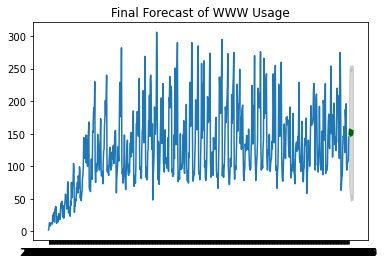

In [29]:
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm
import numpy as np
import matplotlib.pyplot as plt

model = pm.auto_arima(df_milk_1['QUANTITY'], start_p=1, start_q=1,
                      information_criterion='aic',
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=5, max_q=5, # maximum p and q
                      m=2,              # frequency of series
                      max_d=2,           # let model determine 'd'
                      seasonal=True,   # No Seasonality
                      start_P=1, 
                      start_Q=1, max_P=5, max_D=2, max_Q=2,
                      D=1, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=False)

print(model.summary())

# Forecast
n_periods = 10
fc, confint = model.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = np.arange(len(df_milk_1['QUANTITY']), len(df_milk_1['QUANTITY'])+n_periods) 

#如果要從第50週開始看的話，藥用這邊的code
#index_of_fc = np.arange(len(df_milk_1['QUANTITY']+50), len(df_milk_1['QUANTITY'])+50+n_periods) 

# make series for plotting purpose
fc_series = pd.Series(fc, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(df_milk_1['QUANTITY'])
plt.plot(fc_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("Final Forecast of WWW Usage")
plt.show()

### 模型建完後，還可以利用Ljung-box test來測試資料的殘差是否已經沒有週期或規律了，只要P-value < 0.05就可以被認為是統計上的隨機亂數(指隨機產生的誤差量，不具有一定的規律可循)

In [30]:
from statsmodels.stats.diagnostic import acorr_ljungbox
acorr_ljungbox(model.resid(), lags = [2],return_df=True)

,lb_stat,lb_pvalue
2,0.031966,0.984144


### --------------------------------------------------------------------------------------------------------------------------------------------------------------

### 这里，进行残差检验：
- 关于图形检验有四种方法，python使用plot_diagnosis()查看。
 - 1、时序图-------主观判断是否是有趋势或者季节项。
 - 2、直方图-------拟合曲线看是否是正态分布的形状。
 - 3、QQ图-------看是否在一条直线上。
 - 4、自相关图检验-------除了在lags=0的时候，在95%的置信区间之外，其他都在置信区间里面。

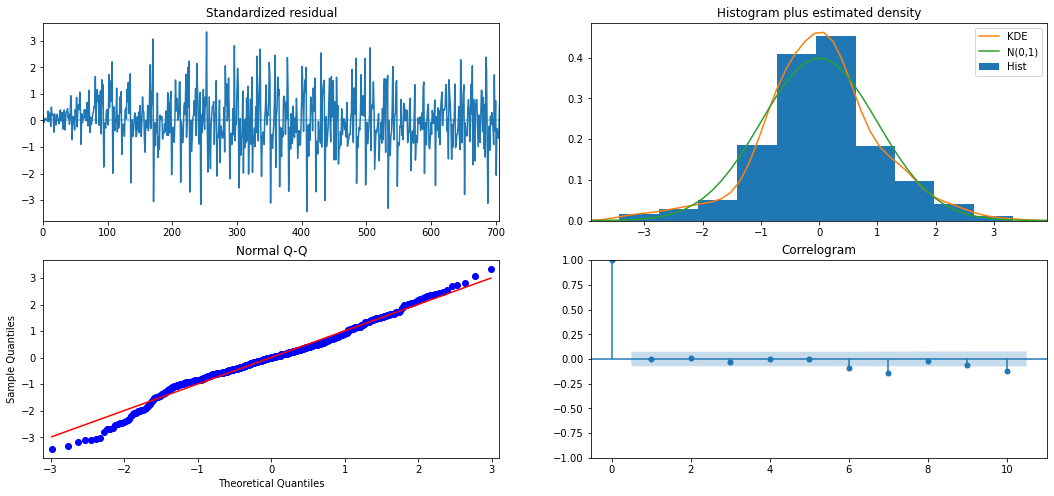

In [31]:
model.plot_diagnostics(figsize=(18, 8))
plt.show()

In [89]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
mod = SARIMAX(df_milk_1['QUANTITY'],
              order=(1, 2, 1),
              seasonal_order=(2, 1, 1, 14),
              enforce_stationarity=True,
              enforce_invertibility=True,
              trend='c')
results = mod.fit()
print(results.summary())

C:\ProgramData\Anaconda3\envs\time_analyse\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\ProgramData\Anaconda3\envs\time_analyse\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                                     SARIMAX Results                                      
Dep. Variable:                           QUANTITY   No. Observations:                  709
Model:             SARIMAX(1, 2, 1)x(2, 1, 1, 14)   Log Likelihood               -3536.703
Date:                            Wed, 28 Jul 2021   AIC                           7087.405
Time:                                    17:19:48   BIC                           7119.192
Sample:                                         0   HQIC                          7099.699
                                            - 709                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0001      0.001      0.111      0.911      -0.002       0.002
ar.L1         -0.2548      0.036   

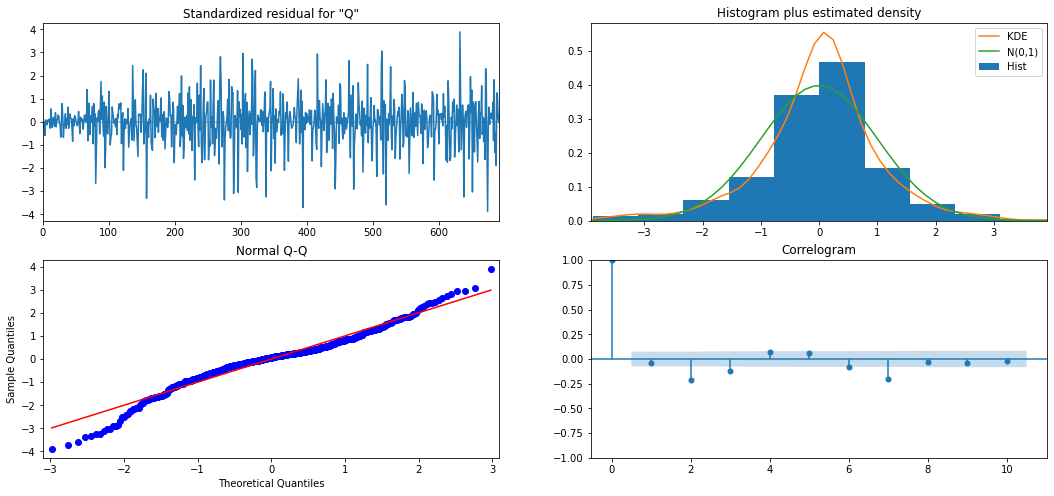

In [90]:
results.plot_diagnostics(figsize=(18, 8))
plt.show()

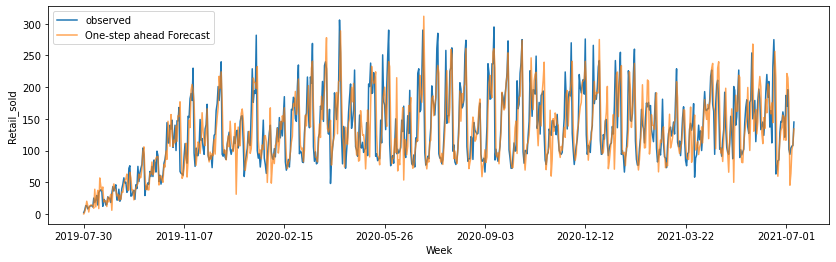

In [102]:
pred = results.get_prediction(start=0, dynamic=False)
pred_ci = pred.conf_int()
ax = df_milk_1['QUANTITY'][0:].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 4))

#畫誤差區間
#ax.fill_between(pred_ci.index,
#                pred_ci.iloc[:, 0],
#                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Week')
ax.set_ylabel('Retail_sold')
plt.legend()
plt.show()

In [92]:
import numpy as np

y_forecasted = pred.predicted_mean
y_truth = df_milk_1['QUANTITY']
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error is {}'.format(round(mse, 2)))
print('The Root Mean Squared Error is {}'.format(round(np.sqrt(mse), 2)))

The Mean Squared Error is 1516.17
The Root Mean Squared Error is 38.94


C:\ProgramData\Anaconda3\envs\time_analyse\lib\site-packages\statsmodels\tsa\base\tsa_model.py:379: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


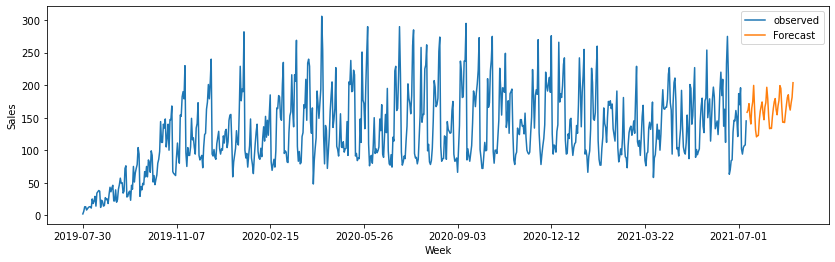

In [96]:
pred_uc = results.get_forecast(steps=50)
pred_ci = pred_uc.conf_int()
ax = df_milk_1['QUANTITY'].plot(label='observed', figsize=(14, 4))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
#ax.fill_between(pred_ci.index,
#                pred_ci.iloc[:, 0],
#                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Week')
ax.set_ylabel('Sales')
plt.legend()
plt.show()